# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400, although we can already see that we are missing items in gre, gpa, and prestige.

#### Question 2. Create a summary table

In [4]:
#function

In [29]:
df_raw.describe()

/Users/Ross/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The heart of this question is whether GRE scores vary significantly more than GPAs - obviously, 115 is a larger value than 0.38, but this is deceptive as GREs are by default a larger number than a GPA.  Therefore, to fully answer this, we must first get a sense of the 'size' of the standard deviations in question.  Quickest way to do this is to divide the standard deviation by the mean of both numbers.  For GPA, we get roughly 0.11 and for GRE we get roughly 0.19.  Thus, we can conclude that the standard deviation of the GRE scores does actually vary more than the GPAs.  There are a few possible explanations for why this is the case.  On a purely mathematical level, the larger STD simplynmeans that GRE scores have a wider range than GPA scores.  This could be a result of outliers in our data or confounding factors, which we can check for. 

On the other hand, examining qualitative causes, it could tell us that applicants with high GPAs won't necessarily have high GRE scores, or vice versa.

#### Question 4. Drop data points with missing data


In [31]:
df_complete = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [33]:
df_complete.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

Answer: Using .dropna() and .count() on the new variable, we can confirm that 3 rows were removed from the dataframe - the original count for the raw input was 400, with 3 missing data points across the three variables.

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x11f319f90>],
 'caps': [<matplotlib.lines.Line2D at 0x11f329dd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f501110>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11f334a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11eee7150>,
  <matplotlib.lines.Line2D at 0x11f329790>]}

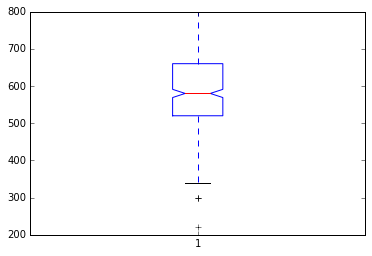

In [57]:
#boxplot 1
plt.figure()
plt.boxplot(df_complete["gre"], 1)

{'boxes': [<matplotlib.lines.Line2D at 0x11d8c1fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x11d96ae10>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d981150>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d974ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11ab175d0>,
  <matplotlib.lines.Line2D at 0x11d96a7d0>]}

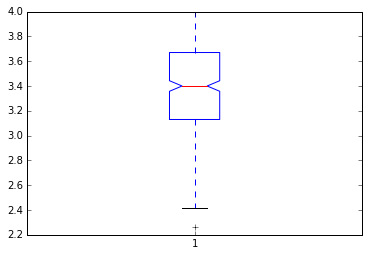

In [38]:
#boxplot 2 
plt.figure()
plt.boxplot(df_complete["gpa"], 1)

#### Question 7. What do this plots show?

Answer: Both plots show us the mean, median, quartiles, high points, and low points of both data sets.  We are looking 

#### Question 8. Describe each distribution 

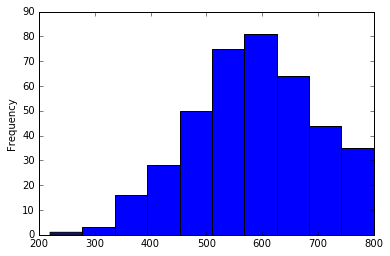

In [58]:
# plot the distribution of each variable 
df_gre = df_complete["gre"]
df_gpa = df_complete["gpa"]
df_pre = df_complete["prestige"]
df_gre.plot.hist()

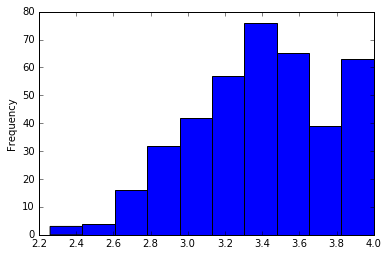

In [49]:
df_gpa.plot.hist()

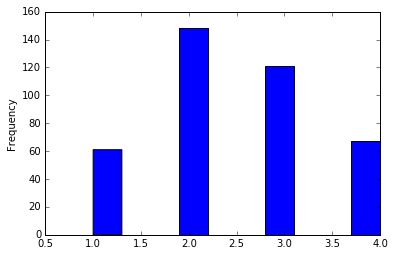

In [59]:
df_pre.plot.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: It looks as if GRE and GPA are scewed to higher scores, thus pulling the distribution to the right.  It's difficult to say if this is normally distributed because we are dealing with a selection of students who will by nature have higher scores - graduate program applicants - and it's difficult to say if GPA and GRE are themselves normally distributed aka graded on a curve.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

In [61]:
# create a correlation matrix for the data
df_complete.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: While there is a positive correlation between GRE, GPA, and admittance, there is a negative correlation between admittance and prestige.  This is not expected and could lead to an interesting examination.  In regards to colinear variables, there doesn't appear to be a strong correlation between the individual predictor variables.  GPA and GRE stand out as the strongest, and even here 0.38 isn't as strong as we might expect, given that one might assume a student with a high GPA would score well on the GRE, or that a student with a lower GPA might score lower.  

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Determine how exactly 'prestige' is quantified on its scale, and then examine what factors are influencing this negative correlation.  It's possible that this is a result of prestigious schools simply having more applicants and that may be pulling the acceptance rate down somehow.  

#### Question 14. What is your hypothesis? 

Answer: Prestige is less of a factor than GPA or GRE, and in fact prestige might be a negative factor in admittance.  The manner in which prestige is determine includes a confounding factor that negatively impacts the chances of admittance.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Replace missing data with a calculated mean value.  

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data